In [2]:
from queue import Queue 

%matplotlib notebook
import matplotlib.pyplot as plt

import mygrad as mg
import numpy as np
import os
import cv2
import glob
from PIL import Image

In [108]:
def floodfill(img, low_cutoff = 0, high_cutoff = 255):
    dx = np.array([1,1,1,0,0,-1,-1,-1])
    dy = np.array([1,0,-1,1,-1,1,0,-1])
    #img should be a np array
    (nrows, ncols) = img.shape
    binary_img = np.zeros(img.shape)
    visited_array = np.zeros(img.shape, dtype = "bool")
    for row in range(nrows):
        for col in range(ncols):
            if (img[row,col] >= low_cutoff and img[row,col] <= high_cutoff):
                binary_img[row,col] = 1
    
    bounds = []
                
    for row in range(nrows):
        for col in range(ncols):
            if (binary_img[row,col] == 0 or visited_array[row,col] == True):
                continue
            maxrow = -1
            maxcol = -1
            minrow = 1000000000
            mincol = 1000000000
            visited_array[row,col] = True
            q = Queue()
            q.put((row,col))
            while (q.qsize() != 0):
                cur_loc = q.get()
                maxrow = max(maxrow, cur_loc[0])
                maxcol = max(maxcol, cur_loc[1])
                minrow = min(minrow, cur_loc[0])
                mincol = min(mincol, cur_loc[1])
                for index in range(8):
                    newx = dx[index] + cur_loc[0]
                    newy = dy[index] + cur_loc[1]
                    if (newx >= 0 and newx < nrows and newy >= 0 and newy < ncols and visited_array[newx, newy] == False and binary_img[newx, newy] == 1):
                        visited_array[newx, newy] = True
                        q.put((newx, newy))
            bounds.append([minrow, maxrow, mincol, maxcol])
    return bounds
                        
    



In [42]:
img = np.array([[0,0,0],[0,1,1],[1,0,0]])

In [43]:
floodfill(img, 1, 4)

[[False False False]
 [False False False]
 [False False False]]


[(1, 0, 2, 2)]

In [53]:
img = plt.imread("greyscalecry.png")
img = np.einsum("...hwc,c->...hw", img[...,:-1], [0.2989, 0.5870, 0.1140])
img.shape
# floodfill(img, high_cutoff=100)

(308, 364)

In [59]:
print(img)
floodfill(img, high_cutoff=0.5)

[[0.9999 0.9999 0.9999 ... 0.9999 0.9999 0.9999]
 [0.9999 0.9999 0.9999 ... 0.9999 0.9999 0.9999]
 [0.9999 0.9999 0.9999 ... 0.9999 0.9999 0.9999]
 ...
 [0.     0.     0.     ... 0.9999 0.9999 0.9999]
 [0.     0.     0.     ... 0.9999 0.9999 0.9999]
 [0.     0.     0.     ... 0.9999 0.9999 0.9999]]


[(0, 48, 6, 61),
 (0, 103, 6, 106),
 (18, 28, 244, 57),
 (20, 255, 243, 294),
 (36, 44, 54, 66),
 (36, 189, 60, 193),
 (37, 225, 59, 247),
 (38, 138, 59, 160),
 (39, 91, 63, 106),
 (45, 0, 51, 0),
 (80, 50, 105, 69),
 (82, 0, 100, 1),
 (82, 139, 101, 159),
 (82, 181, 101, 203),
 (83, 93, 101, 111),
 (85, 228, 106, 252),
 (119, 94, 149, 116),
 (122, 178, 144, 196),
 (123, 229, 146, 235),
 (125, 52, 145, 73),
 (126, 136, 144, 154),
 (165, 177, 186, 197),
 (165, 224, 189, 249),
 (167, 55, 184, 60),
 (169, 90, 191, 112),
 (169, 136, 188, 156),
 (204, 91, 230, 112),
 (206, 181, 232, 203),
 (210, 53, 228, 75),
 (211, 140, 234, 146),
 (212, 225, 232, 248),
 (245, 48, 275, 66),
 (247, 27, 278, 40),
 (249, 83, 253, 89),
 (250, 266, 277, 278),
 (255, 297, 259, 301),
 (257, 128, 274, 137),
 (259, 112, 274, 122),
 (262, 142, 273, 160),
 (263, 71, 298, 87),
 (263, 93, 275, 107),
 (264, 165, 278, 174),
 (265, 283, 278, 292),
 (266, 181, 287, 196),
 (266, 229, 280, 249),
 (266, 255, 276, 265),
 (266,

In [77]:
def rgb_to_grayscale(rgb_img):
    img = np.einsum("...hwc,c->...hw", rgb_img, [0.2989, 0.5870, 0.1140])
    return img

<IPython.core.display.Javascript object>


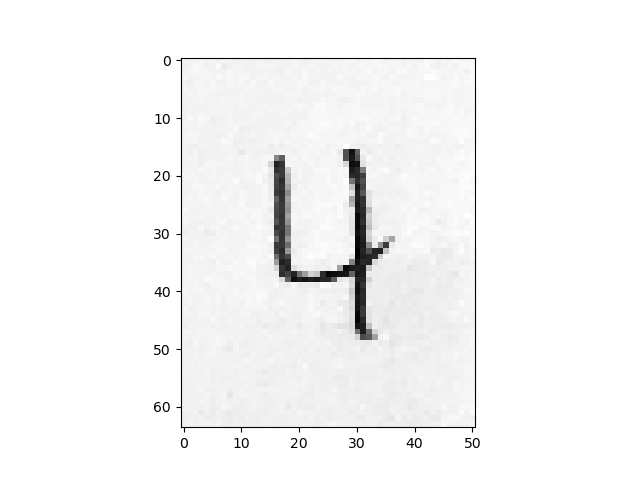

[211, 244, 415, 450]
[213, 245, 345, 372]
[219, 249, 291, 314]
[223, 251, 162, 189]
[225, 252, 220, 248]
[226, 257, 101, 123]
[227, 259, 44, 63]


In [147]:
img = plt.imread("Test_Numbers_2.jpg")
# print(img.shape)
new_img = rgb_to_grayscale(img)
new_img = new_img.T[...,::-1]
(nrows, ncols) = new_img.shape
if (nrows > 500):
    new_img = cv2.resize(new_img, (500, nrows))
(nrow, ncols) = new_img.shape
if (nrows > 500):
    new_img = cv2.resize(new_img, (ncols, 500))
plt.imshow(new_img, cmap = "gray")
subimages = floodfill(new_img, high_cutoff=100)
for subimage in subimages:
    print(subimage)
    subimage[0] -= 16
    subimage[1] += 16
    subimage[2] -= 16
    subimage[3] += 16
answers = []
for subimage in subimages:
    answers.append(new_img[subimage[0]:subimage[1],subimage[2]:subimage[3]])


In [155]:
# plt.imshow(new_img, cmap = "gray")
plt.imshow(answers[6], cmap = "gray")

In [130]:
test_arr[1:3,1:3]

array([[ 6,  7],
       [11, 12]])